Question no. 2

ONLINEFOOD

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64


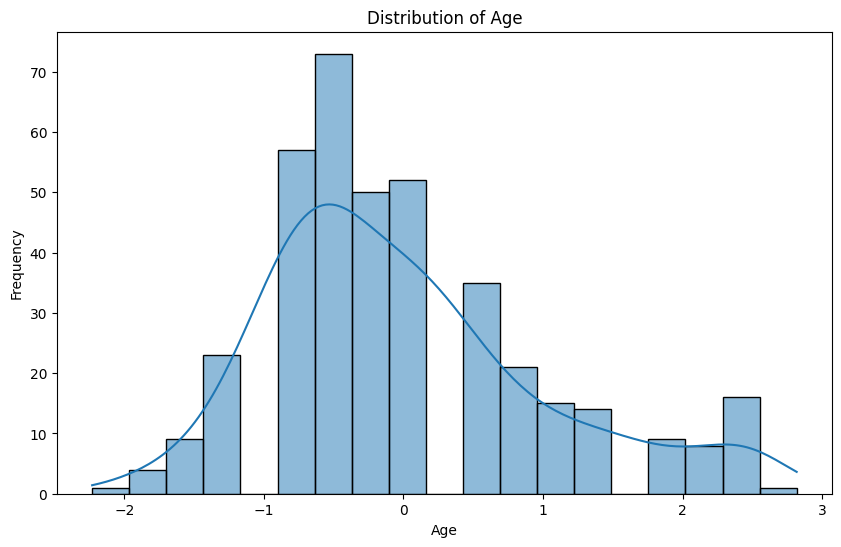

In [13]:
# Step 1: Loading the dataset
import pandas as pd

# Load the dataset
data = pd.read_csv("onlinefoods.csv")

# Step 2: Preprocessing the data
# Check for missing values
print(data.isnull().sum())
data['Monthly Income'] = data['Monthly Income'].replace('No Income', 0)
data['Monthly Income'] = pd.to_numeric(data['Monthly Income'], errors='coerce')

# Replace NaN values with appropriate imputation strategy (e.g., median)
median_income = data['Monthly Income'].median()
data['Monthly Income'].fillna(median_income, inplace=True)
# Handle missing values
data.dropna(inplace=True)

# Encode categorical variables
data = pd.get_dummies(data, columns=['Gender', 'Marital Status', 'Occupation', 'Educational Qualifications'])

# Normalize numerical variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['Age', 'Monthly Income', 'Family size', 'latitude', 'longitude', 'Pin code']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Step 3: Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of numerical variables
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Feedback' column
data['Feedback'] = label_encoder.fit_transform(data['Feedback'])

In [27]:

data=data.drop('Unnamed: 12',axis=1)
print(data.columns)

Index(['Age', 'Monthly Income', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback', 'Gender_Female', 'Gender_Male',
       'Marital Status_Married', 'Marital Status_Prefer not to say',
       'Marital Status_Single', 'Occupation_Employee', 'Occupation_House wife',
       'Occupation_Self Employeed', 'Occupation_Student',
       'Educational Qualifications_Graduate',
       'Educational Qualifications_Ph.D',
       'Educational Qualifications_Post Graduate',
       'Educational Qualifications_School',
       'Educational Qualifications_Uneducated'],
      dtype='object')


In [28]:
# Step 1: Identify columns with non-numeric values
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
print("Columns with non-numeric values:", non_numeric_columns)

# Step 2: Handle non-numeric columns
for column in non_numeric_columns:
    # Determine how to handle the column based on its nature
    if column == 'Monthly Income':
        # Handle 'Monthly Income' column if it contains non-numeric values
        # For example, you can replace non-numeric values with NaN and then impute them
        data['Monthly Income'] = pd.to_numeric(data['Monthly Income'], errors='coerce')
        median_income = data['Monthly Income'].median()
        data['Monthly Income'].fillna(median_income, inplace=True)
    elif column == 'Feedback':
        # Handle 'Feedback' column if it contains non-numeric values
        # For example, you can use label encoding if 'Feedback' represents categories
        from sklearn.preprocessing import LabelEncoder
        label_encoder = LabelEncoder()
        data['Feedback'] = label_encoder.fit_transform(data['Feedback'])
    else:
        # Handle other non-numeric columns as needed
        # This could include one-hot encoding for categorical variables or other transformations
        pass


Columns with non-numeric values: Index(['Output', 'Gender_Female', 'Gender_Male', 'Marital Status_Married',
       'Marital Status_Prefer not to say', 'Marital Status_Single',
       'Occupation_Employee', 'Occupation_House wife',
       'Occupation_Self Employeed', 'Occupation_Student',
       'Educational Qualifications_Graduate',
       'Educational Qualifications_Ph.D',
       'Educational Qualifications_Post Graduate',
       'Educational Qualifications_School',
       'Educational Qualifications_Uneducated'],
      dtype='object')


In [39]:
mapping_dict = {'No': 0, 'Yes': 1}
data['Output'] = data['Output'].map(mapping_dict)


In [40]:
X = data.drop('Output', axis=1) # TO FILTER out te target variable
y = data['Output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#here the data gets split

In [42]:
# Encode the target variable 'Output'
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Fit the Linear Regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train_encoded)
y_test_pred=model.predict(X_test)
print(y_test_pred)

[0.23096012 0.9362405  0.90989138 0.9562108  0.20389038 0.33318925
 0.97210543 0.91550341 0.79175244 0.78658374 1.03191903 0.79158089
 0.32986093 0.88835196 0.87431551 0.94353832 0.98080086 0.57828797
 0.98099308 0.94741264 0.95643948 0.97318173 1.03030261 0.85218914
 0.93572975 0.93092369 0.93572975 0.32606411 1.04818    0.24702691
 0.94841185 0.95643948 0.83314227 0.90171313 0.71093194 0.91956719
 0.9925563  0.98532653 1.01145    0.96451657 0.19773491 0.97531475
 0.81542942 0.98099308 0.95788873 0.12919642 1.0062064  0.8883312
 0.83314227 0.74663669 1.00904031 0.99203608 0.8836751  0.98687544
 0.86124927 0.99915864 1.00171014 0.9463646  0.89552944 0.85865128
 0.8834739  0.7357212  0.84733983 0.9226807  0.98759647 0.82649546
 0.75214486 0.19354114 0.95132163 0.88275189 0.03858136 0.9383931
 0.97881222 0.8883312  0.33458393 0.9362405  0.94897719 0.65102396]


In [69]:
#R2
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.20844708297542747


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


In [76]:
#MLP
from sklearn.metrics import accuracy_score

# Instantiate the MLPClassifier model
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)

# Train the model
mlp_classifier.fit(X_train, y_train)

# Make predictions
y_test_pred = mlp_classifier.predict(X_test)

# Evaluate the model
accuracy_MLP = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy_MLP)


Accuracy: 0.8717948717948718


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [77]:
#PLA
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Instantiate the Perceptron model
pla = Perceptron(max_iter=1000, random_state=42)

# Train the model
pla.fit(X_train, y_train)

# Make predictions
y_test_pred = pla.predict(X_test)

# Evaluate the model
accuracy_PLA = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy_PLA)


Accuracy: 0.8461538461538461


In [85]:
#KNN
from sklearn.metrics import mean_squared_error, accuracy_score

# Instantiate the KNN model

knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_test_pred = knn.predict(X_test)

# Evaluate the model

accuracy_KNN = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy_KNN)


Accuracy: 0.8589743589743589


In [84]:
#SVM
from sklearn.metrics import accuracy_score

# Instantiate the SVC model
svc = SVC(kernel='linear')

# Train the model
svc.fit(X_train, y_train)

# Make predictions
y_test_pred = svc.predict(X_test)

# Evaluate the model
accuracy_SVM = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy_SVM)


Accuracy: 0.8589743589743589


In [80]:
#NB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, accuracy_score

# Instantiate the Gaussian Naive Bayes model
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Make predictions
y_test_pred = gnb.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)
print(mse)

accuracy_NB = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy_NB)


0.21794871794871795
Accuracy: 0.782051282051282


ACCURACY

In [82]:
print("the accuracy of all models")
print("Accuracy of PLA  ",accuracy_PLA)
print("Accuracy of MLP  ",accuracy_MLP)
print("Accuracy of NB  ",accuracy_NB)
print("Accuracy of SVM " ,accuracy_SVM)
print("Accuracy of KNN ",accuracy_KNN)
print("R2 OF LR  ",r2)

the accuracy of all models
Accuracy of PLA   0.8461538461538461
Accuracy of MLP   0.8717948717948718
Accuracy of NB   0.782051282051282
Accuracy of SVM  0.8589743589743589
Accuracy of KNN  0.8589743589743589
R2 OF LR   0.20844708297542747


9)ROC CURVE

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


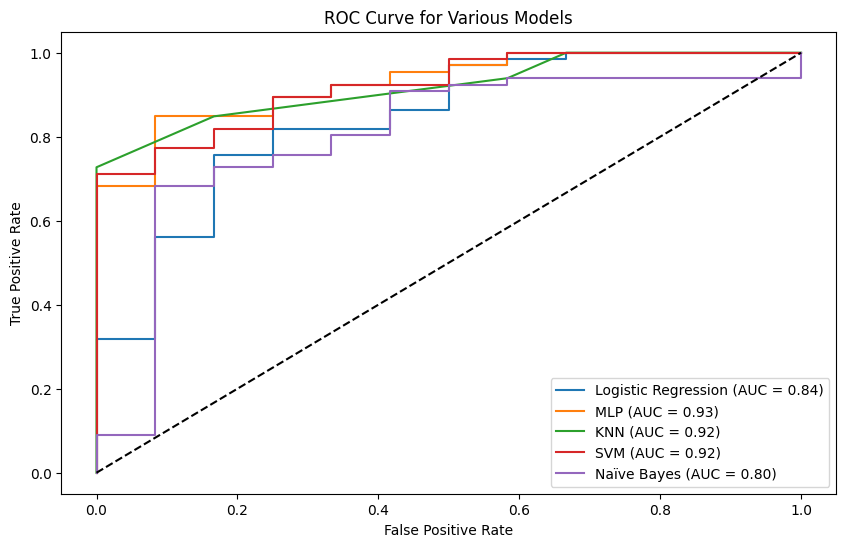

In [83]:
from sklearn.metrics import roc_curve, roc_auc_score
models = {
    'Logistic Regression': LogisticRegression(),
    'MLP': MLPClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'Naïve Bayes': GaussianNB()
} # all the models have been placed in a single dictionary

# Plot ROC curve for each model
plt.figure(figsize=(10, 6))
for name, model in models.items(): # the models are iterating over the dictionary
    model.fit(X_train, y_train)
    if hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
    else:
        y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc = roc_auc_score(y_test, y_score)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})') #plotting the graph

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Various Models')
plt.legend()
plt.show()


q10

SVM and KNN are the best model for the given dataset as they have high accuracy .
SVM have high accuracy for their high dimensionality whereas KNN performs well in high dimensional spaces.
Both are robust to outliers.
The flexibility allows them to adapt to various shapes of data distributions.
